In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style="white", color_codes=True)

%matplotlib inline

What is Statbank API?

The Central Statistics Office (CSO) StatBank Application Programming Interface (API) provides access to StatBank data in JSON-stat format. This dissemination tool allows developers machine to machine access to CSO StatBank data. Details about JSON-stat can be found at this web address http://json-stat.org/.

The majority of StatBank tables are available in JSON-stat format, on the StatBank API. StatBank tables with over 150,000 data points are not available in the StatBank API and a message to this effect is presented when you select the JSON table e.g. TDM04 is not available. A list of the StatBank tables that are unavailable are presented here.

If you encounter any difficulties please email databank@cso.ie.

CSO wish you every success using this new data dissemination tool and we welcome your feedback at databank@cso.ie.

Download Data

To download a StatBank table in JSON-stat please click here

There is a list of themes that follow a similar structure to StatBank. Select the theme and subtheme you are interested in and the data tables available will be displayed. Tables are listed as Key Tables, Current Tables and Archived Tables to assist with appropriate selection. The final theme PSSN, is the data hosted by the CSO for other government departments through the CSO Public Sector Statistics Network. Remember tables with over 150,000 data points though listed are not available for download with this application. Details about JSON-stat can be found at this web address http://json-stat.org/ .


http://www.cso.ie/webserviceclient/
http://www.cso.ie/webserviceclient/DatasetListing.aspx  

pyjstat is a python library for JSON-stat formatted data manipulation which allows reading and writing JSON-stat [1] format with python,using the DataFrame structures provided by the widely accepted pandas library [2]. The JSON-stat format is a simple lightweight JSON format for data dissemination, currently in its 2.0 version. Pyjstat is inspired in rjstat [3], a library to read and write JSON-stat with R, by ajschumacher. Note that, like in the rjstat project, not all features are supported (i.e. not all metadata are converted). pyjstat is provided under the Apache License 2.0.

[1]	http://json-stat.org/ for JSON-stat information
[2]	http://pandas.pydata.org for Python Data Analysis Library information
[3]	https://github.com/ajschumacher/rjstat for rjstat library information
This library was first developed to work with Python 2.7. With some fixes (thanks to @andrekittredge), now it works with Python 3.4 too.

https://pypi.python.org/pypi/pyjstat/

###### Residential Dwelling Property Transactions by County, Dwelling Status, Stamp Duty Event, Type of Buyer, Type of Sale, Month and Statistic

###### Variables

* County (27) -- for all counties
* Dwelling Status (3)
* Stamp Duty Event (2)
* Type of Buyer (6)
* Type of Sale (3)
* Time (87)
* Contents (4)

In [2]:
from pyjstat import pyjstat
# read from json-stat
url = 'http://www.cso.ie/StatbankServices/StatbankServices.svc/jsonservice/responseinstance/HPM02'
dataset = pyjstat.Dataset.read(url)
df = dataset.write('dataframe')
print(df)

INFO:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): www.cso.ie


               County        Dwelling Status Stamp Duty Event  \
0        All Counties  All Dwelling Statuses          Filings   
1        All Counties  All Dwelling Statuses          Filings   
2        All Counties  All Dwelling Statuses          Filings   
3        All Counties  All Dwelling Statuses          Filings   
4        All Counties  All Dwelling Statuses          Filings   
5        All Counties  All Dwelling Statuses          Filings   
6        All Counties  All Dwelling Statuses          Filings   
7        All Counties  All Dwelling Statuses          Filings   
8        All Counties  All Dwelling Statuses          Filings   
9        All Counties  All Dwelling Statuses          Filings   
10       All Counties  All Dwelling Statuses          Filings   
11       All Counties  All Dwelling Statuses          Filings   
12       All Counties  All Dwelling Statuses          Filings   
13       All Counties  All Dwelling Statuses          Filings   
14       All Counties  Al

In [3]:
df1 = pd.DataFrame.from_records(df)

In [5]:
#select dublin
df_dublin = df1.ix[(df['County'] == 'Dublin')]

In [52]:
df_dublin.head(8)
df_dublin = df_dublin.drop("County" , axis = 1)


ValueError: labels ['County'] not contained in axis

In [49]:
#http://pbpython.com/pandas-pivot-table-explained.html
pd.pivot_table(df_dublin,index=["Statistic","Month"])

value
Statistic                  Month                 
Average Sale Price  (Euro) 2010M01  287752.515464
                           2010M02  238884.192308
                           2010M03  248683.805825
                           2010M04  238374.951923
                           2010M05  383442.519608
                           2010M06  380223.142857
                           2010M07  224647.142857
                           2010M08  268089.626263
                           2010M09  445920.009434
                           2010M10  221755.962264
                           2010M11  185450.650485
                           2010M12  234692.648148
                           2011M01  219869.283019
                           2011M02  204631.663551
                           2011M03  232526.364486
                           2011M04  194254.130841
                           2011M05  206891.971963
                           2011M06  214624.869159
                           2011M07  242282.771429
                           2011M08  207490.632075
                           2011M09  233149.379630
                           2011M10  232583.480392
                           2011M11  199569.873786
                           2011M12  184856.796117
                           2012M01  224710.262136
                           2012M02  230074.428571
                           2012M03  200256.115385
                           2012M04  177435.688679
                           2012M05  200923.869159
                           2012M06  203702.905660
...                                           ...
Volume of Sales (Number)   2014M10     376.148148
                           2014M11     269.296296
                           2014M12     391.703704
                           2015M01     326.333333
                           2015M02     276.481481
                           2015M03     251.777778
                           2015M04     239.666667
                           2015M05     265.666667
                           2015M06     314.037037
                           2015M07     319.333333
                           2015M08     255.851852
                           2015M09     291.185185
                           2015M10     272.074074
                           2015M11     269.518519
                           2015M12     318.740741
                           2016M01     212.703704
                           2016M02     269.074074
                           2016M03     244.666667
                           2016M04     242.074074
                           2016M05     251.296296
                           2016M06     263.777778
                           2016M07     278.925926
                           2016M08     297.555556
                           2016M09     304.296296
                           2016M10     293.518519
                           2016M11     308.740741
                           2016M12     395.074074
                           2017M01     294.555556
                           2017M02     233.962963
                           2017M03     225.074074

[348 rows x 1 columns]

In [54]:
df_dublin = df_dublin.set_index("Month")

In [55]:
df_dublin.head()

,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,Statistic,value
Month,,,,,,
2010M01,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,Volume of Sales (Number),360.0
2010M01,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,Value of Sales (Euro Million),119.0
2010M01,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,Average Sale Price (Euro),330459.0
2010M01,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,Median Price (Euro),264549.0
2010M02,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,Volume of Sales (Number),507.0


In [61]:
df_dublin = df_dublin.sort_index(ascending= True)

In [72]:
df_dublin.loc[df_dublin["Statistic"] == "Average Sale Price  (Euro)"]

,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,Statistic,value
Month,,,,,,
2010M01,Existing,Filings,Household Buyer - Non-Occupier,Market,Average Sale Price (Euro),727178.0
2010M01,All Dwelling Statuses,Filings,Household Buyer - Non-Occupier,Non-Market,Average Sale Price (Euro),56929.0
2010M01,Existing,Filings,Household Buyer - Non-Occupier,All Sale Types,Average Sale Price (Euro),327880.0
2010M01,All Dwelling Statuses,Filings,Non-Household Buyer,All Sale Types,Average Sale Price (Euro),665350.0
2010M01,Existing,Filings,Household Buyer - Former Owner-Occupier,Non-Market,Average Sale Price (Euro),123437.0
2010M01,Existing,Filings,Household Buyer - Former Owner-Occupier,Market,Average Sale Price (Euro),511284.0
2010M01,Existing,Filings,Non-Household Buyer,Market,Average Sale Price (Euro),665350.0
2010M01,All Dwelling Statuses,Filings,Household Buyer - Non-Occupier,All Sale Types,Average Sale Price (Euro),325008.0
2010M01,Existing,Executions,Non-Household Buyer,Non-Market,Average Sale Price (Euro),53080.0


In [67]:
df_av_sale

,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,Statistic,value
Month,,,,,,


In [9]:
#select all the counties without All Counties 
#https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas
df2 = df1.loc[(df['County'] != 'All Counties') & (df['Statistic'] == 'Median Price (Euro)')]

In [10]:
df2.head()

,County,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,Month,Statistic,value
37587,Carlow,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,2010M01,Median Price (Euro),176750.0
37591,Carlow,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,2010M02,Median Price (Euro),140332.0
37595,Carlow,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,2010M03,Median Price (Euro),82500.0
37599,Carlow,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,2010M04,Median Price (Euro),57000.0
37603,Carlow,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,2010M05,Median Price (Euro),133000.0


In [12]:
df2.groupby(['County']).groups.keys()

dict_keys(['Mayo', 'Limerick', 'Leitrim', 'Kilkenny', 'Kerry', 'Clare', 'Cavan', 'Louth', 'Tipperary', 'Kildare', 'Laois', 'Galway', 'Wicklow', 'Sligo', 'Offaly', 'Carlow', 'Meath', 'Donegal', 'Waterford', 'Roscommon', 'Cork', 'Wexford', 'Westmeath', 'Monaghan', 'Dublin', 'Longford'])

In [19]:
#this creates a series
df2.groupby('County')['value'].mean()

County
Carlow        95805.629025
Cavan         74782.863636
Clare         90007.278562
Cork         123952.165747
Donegal       76947.792565
Dublin       196899.081294
Galway       119431.228270
Kerry         99206.845771
Kildare      152096.277813
Kilkenny     107529.880663
Laois         82127.440678
Leitrim       70550.621939
Limerick      95017.405943
Longford      61316.245078
Louth        101292.775719
Mayo          81134.687697
Meath        130949.518757
Monaghan      83970.351882
Offaly        82788.970629
Roscommon     64470.435536
Sligo         96591.236086
Tipperary     83664.246036
Waterford     89573.954161
Westmeath     83469.881221
Wexford       96231.365000
Wicklow      175307.903325
Name: value, dtype: float64

http://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/


In [21]:
#convert the series to a dataframe
df3 = df3.to_frame('Mean Price').reset_index()

In [22]:
df3

,County,Mean Price
0,Carlow,95805.629025
1,Cavan,74782.863636
2,Clare,90007.278562
3,Cork,123952.165747
4,Donegal,76947.792565
5,Dublin,196899.081294
6,Galway,119431.228270
7,Kerry,99206.845771
8,Kildare,152096.277813
9,Kilkenny,107529.880663


In [8]:
print ("\n\n---------------------")
print ("TRAIN SET INFORMATION")
print ("---------------------")
print ("Shape of training set:", df2.shape, "\n")
print ("Column Headers:", list(df2.columns.values), "\n")
print (df2.dtypes)



---------------------
TRAIN SET INFORMATION
---------------------
Shape of training set: (977184, 8) 

Column Headers: ['County', 'Dwelling Status', 'Stamp Duty Event', 'Type of Buyer', 'Type of Sale', 'Month', 'Statistic', 'value'] 

County               object
Dwelling Status      object
Stamp Duty Event     object
Type of Buyer        object
Type of Sale         object
Month                object
Statistic            object
value               float64
dtype: object


In [9]:
import re
missing_values = []
nonumeric_values = []

print ("TRAINING SET INFORMATION")
print ("========================\n")

for column in df2:
    # Find all the unique feature values
    uniq = df2[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(df2[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

TRAINING SET INFORMATION

'County' has 26 unique values
~~Listing up to 10 unique values~~
['Carlow' 'Dublin' 'Kildare' 'Kilkenny' 'Laois' 'Longford' 'Louth' 'Meath'
 'Offaly' 'Westmeath']

-----------------------------------------------------------------------

'Dwelling Status' has 3 unique values
['All Dwelling Statuses' 'New' 'Existing']

-----------------------------------------------------------------------

'Stamp Duty Event' has 2 unique values
['Filings' 'Executions']

-----------------------------------------------------------------------

'Type of Buyer' has 6 unique values
['All Buyer Types' 'Household Buyer - All'
 'Household Buyer - First-Time Buyer Owner-Occupier'
 'Household Buyer - Former Owner-Occupier' 'Household Buyer - Non-Occupier'
 'Non-Household Buyer']

-----------------------------------------------------------------------

'Type of Sale' has 3 unique values
['All Sale Types' 'Market' 'Non-Market']

-------------------------------------------------------------

In [10]:
df2.Statistic

37584           Volume of Sales (Number)
37585      Value of Sales (Euro Million)
37586         Average Sale Price  (Euro)
37587                Median Price (Euro)
37588           Volume of Sales (Number)
37589      Value of Sales (Euro Million)
37590         Average Sale Price  (Euro)
37591                Median Price (Euro)
37592           Volume of Sales (Number)
37593      Value of Sales (Euro Million)
37594         Average Sale Price  (Euro)
37595                Median Price (Euro)
37596           Volume of Sales (Number)
37597      Value of Sales (Euro Million)
37598         Average Sale Price  (Euro)
37599                Median Price (Euro)
37600           Volume of Sales (Number)
37601      Value of Sales (Euro Million)
37602         Average Sale Price  (Euro)
37603                Median Price (Euro)
37604           Volume of Sales (Number)
37605      Value of Sales (Euro Million)
37606         Average Sale Price  (Euro)
37607                Median Price (Euro)
37608           

In [ ]:
for value1 in df2.County:
    df3 = df2.loc[(df2['County'] == 'value1') & (df2['Statistic'] == 'Median Price (Euro)')]

In [24]:
df3.value.mean()

95805.6290250779

In [23]:
df3

,County,Dwelling Status,Stamp Duty Event,Type of Buyer,Type of Sale,Month,Statistic,value
37587,Carlow,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,2010M01,Median Price (Euro),176750.0
37591,Carlow,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,2010M02,Median Price (Euro),140332.0
37595,Carlow,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,2010M03,Median Price (Euro),82500.0
37599,Carlow,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,2010M04,Median Price (Euro),57000.0
37603,Carlow,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,2010M05,Median Price (Euro),133000.0
37607,Carlow,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,2010M06,Median Price (Euro),140000.0
37611,Carlow,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,2010M07,Median Price (Euro),149000.0
37615,Carlow,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,2010M08,Median Price (Euro),172500.0
37619,Carlow,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,2010M09,Median Price (Euro),113000.0
37623,Carlow,All Dwelling Statuses,Filings,All Buyer Types,All Sale Types,2010M10,Median Price (Euro),180000.0


In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

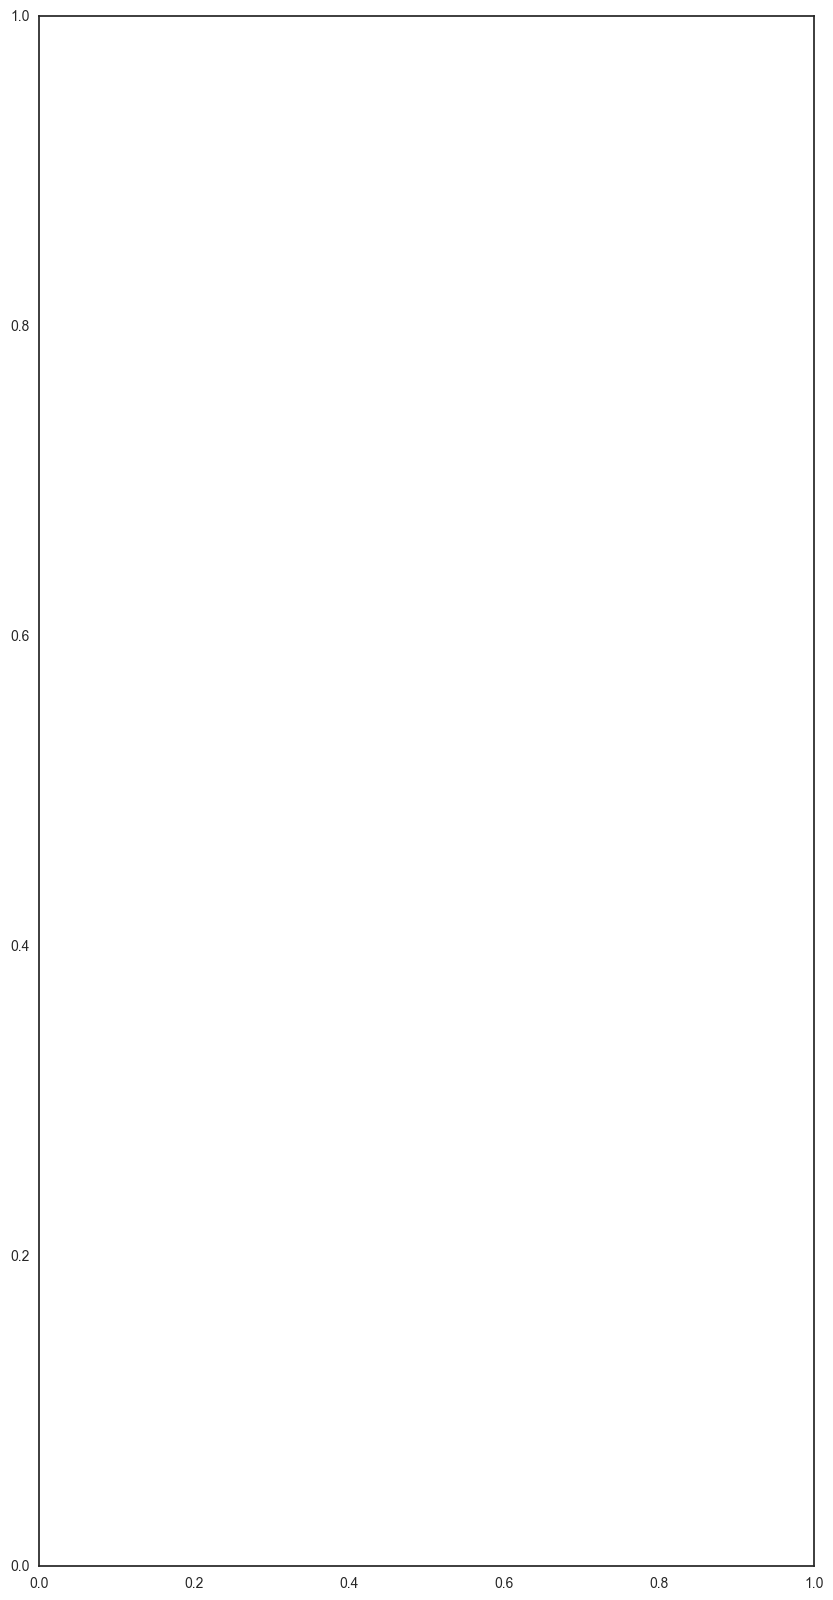

In [25]:
fig, ax = plt.subplots(figsize=(10,20))
m = Basemap(resolution='c', # c, l, i, h, f or None
            projection='merc',
            lat_0=0, lon_0= 0,
            llcrnrlon=-10.49, llcrnrlat= 51.25, urcrnrlon=-5.8, urcrnrlat=54.56)

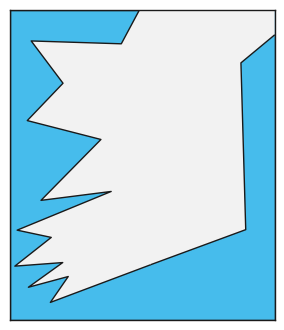

In [26]:
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()